In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/user_data.csv")

In [3]:
interesting_columns = [
    "total_entries",
    "days_watched",
    "completed",
    "episodes_watched",

    "mean_score",
]
data = data[interesting_columns]
# data = data[data["total_entries"] > 10]

data["mean_score_adj"] = (data["mean_score"].round() / 2).astype("int")

interesting_columns[-1] = "mean_score_adj"
data = data[interesting_columns]

In [4]:
data.head(5)

,total_entries,days_watched,completed,episodes_watched,mean_score_adj
0,477,181.6,467,11160,4
1,2271,263.3,1125,16195,4
2,1070,270.4,887,16189,3
3,518,17.8,102,1093,3
4,325,65.2,193,3961,3


In [5]:
X = data[interesting_columns[:-1]]
y = data[interesting_columns[-1]].to_frame()

In [6]:
def draw_clusters(x, y, cols):
    plt.figure(figsize=(12, 12))
    plt.scatter(x, y,
                c=cols, edgecolor='none',
                cmap=plt.cm.get_cmap('nipy_spectral', 6))
    plt.colorbar()
    plt.show()

In [7]:
import umap

umap = umap.UMAP(n_neighbors=8, min_dist=0.2, random_state=0, n_jobs=6)
X_reduced = umap.fit_transform(X)

xs = X_reduced[:, 0].flatten()
ys = X_reduced[:, 1].flatten()

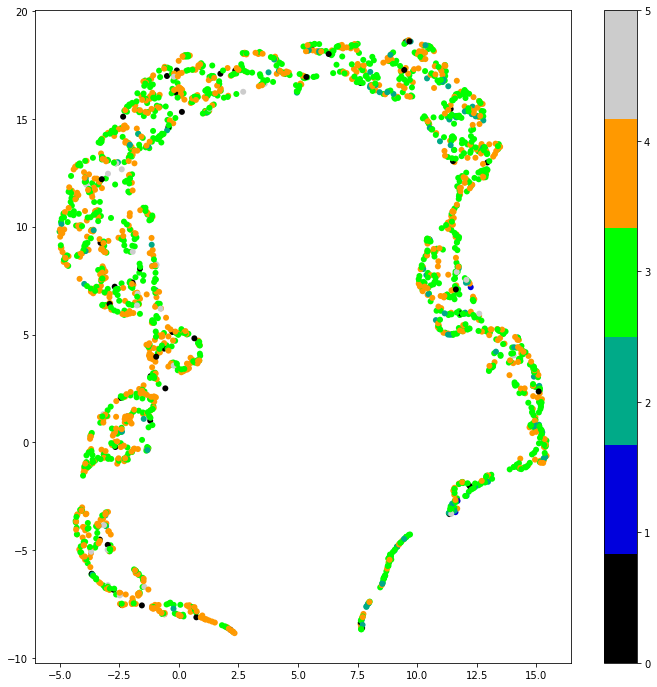

In [8]:
draw_clusters(xs, ys, y.values)

In [9]:
from sklearn.cluster import KMeans

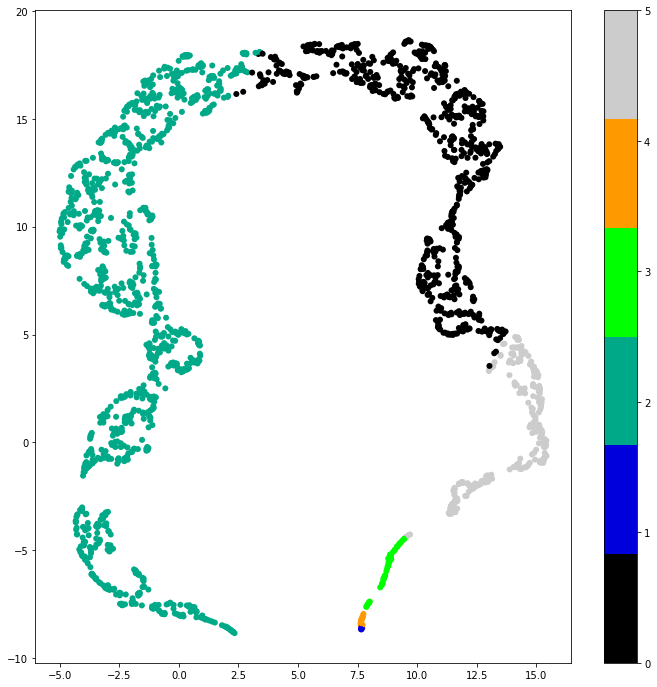

In [10]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans_res = kmeans.fit_predict(X)

draw_clusters(xs, ys, kmeans_res)

In [11]:
from cluster_metrics import count_metrics

In [12]:
xs = xs.astype("float64")
ys = ys.astype("float64")
to_self, to_different = count_metrics(xs, ys, kmeans_res)

print("to same: {}, to different: {}, relation: {}".format(to_self, to_different, to_self / to_different))

to same: 8.553790564894904, to different: 16.41811444520491, relation: 0.5209971335894258
